In [1]:
# Import library
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import os

# Data paths
cwd = Path(os.getcwd())
parent_dir = cwd.parent.parent
calcdata_path = parent_dir / "data" / "calculated_data.csv"
Simulated_data_path = parent_dir / "data" / "Simulated data"
sim_log_path = Simulated_data_path / "Simulation_log.csv"

# Load calculated data and simulation log
calcdata_df = pd.read_csv(calcdata_path)
sim_log_df = pd.read_csv(sim_log_path)

# Print Water system name list
print("\nAvailable Simulated water systems:\n")
water_systems = sim_log_df["Water system name"].dropna().unique()
for i, name in enumerate(water_systems, start=1):
    print(f"{i}. {name}")

# Select water system
selection = input("\nSelect a water system by number: ")
try:
    idx = int(selection)
    selected_system = water_systems[idx - 1]
    print(f"\nSelected Water System: {selected_system}\n")
except (ValueError, IndexError):
    print("Invalid selection. Exiting.")
    exit()

# Filtered data for the selected water system
ws_filtered = sim_log_df[sim_log_df["Water system name"] == selected_system]
lake_ws_filtered = calcdata_df[calcdata_df["Water system name"] == selected_system]
sample_names = ws_filtered["Sample name"].dropna().unique()

# Print Sample name list
print("\nAvailable Simulated Samples:\n")
for i, name in enumerate(sample_names, start=1):
    print(f"{i}. {name}")

# Select sample
selection = input("\nSelect a Sample by number: ")
try:
    idx = int(selection)
    selected_sample = sample_names[idx - 1]
    print(f"\nSelected Sample: {selected_sample}\n")
except (ValueError, IndexError):
    print("Invalid selection. Exiting.")
    exit()

# Filtered data for the selected sample
sample_filtered = ws_filtered[ws_filtered["Sample name"] == selected_sample]
sampling_date = sample_filtered["Sampling date"].dropna().unique()

# Print Sampling Date list
print("\nAvailable Sampling Dates:\n")
for i, date in enumerate(sampling_date, start=1):
    print(f"{i}. {date}")

# Select sampling date
selection = input("\nSelect a Sampling Date by number: ")
try:
    idx = int(selection)
    selected_date = sampling_date[idx - 1]
    print(f"\nSelected Sampling Date: {selected_date}\n")
except (ValueError, IndexError):
    print("Invalid selection. Exiting.")
    exit()

# log cols
log_cols = sim_log_df.columns.tolist()
log_cols.remove("Water system name")
log_cols.remove("Sample name")
log_cols.remove("Sampling date")
log_cols.remove("Index")
log_cols.remove("Timestamp")

# Selected entry
entry = sim_log_df[
    (sim_log_df["Water system name"] == selected_system)
    & (sim_log_df["Sample name"] == selected_sample)
    & (sim_log_df["Sampling date"] == selected_date)
]

while True:
    # clear the console
    os.system("cls" if os.name == "nt" else "clear")

    # Print file name
    file_names = entry["File name"].dropna().unique()
    print(f"\nAvailable Simulation File Names:\n")
    for i, name in enumerate(file_names, start=1):
        print(f"{i}. {name}")

    # Select file name
    selection = input("\nSelect a File Name by number: ")
    try:
        idx = int(selection)
        selected_file = file_names[idx - 1]
        print(f"\nSelected File Name: {selected_file}\n")
    except (ValueError, IndexError):
        print("Invalid selection. Exiting.")
        exit()

    # Filtered entry for the selected file name
    selected_file = entry[entry["File name"] == selected_file]

    # Print conditions
    print("\n==Selected Simulation Conditions==\n")
    row = selected_file.iloc[0]
    for col in log_cols:
        print(f"{col}: {row[col]}")

    # Confirm the data
    confirm = (
        input("\nDo you want to proceed with the simulation? (y/n): ").strip().lower()
    )
    if confirm != "y":
        print("\nBack to the file selection.\n")
        continue
    else:
        # Load the simulation data
        sim_df = pd.read_csv(Simulated_data_path / f"{entry["File name"].iloc[0]}")
        print(f"\nLoaded simulation data from {entry['File name'].iloc[0]}.\n")
        break


Available Simulated water systems:

1. Boon Tsagaan Lake
2. Orog Lake

Selected Water System: Boon Tsagaan Lake


Available Simulated Samples:

1. BD_01
2. BD_01-1
3. BD_02
4. BD_T
5. BD_E1
6. BD_E2
7. BD_02D
8. BD_E2-1

Selected Sample: BD_E1


Available Sampling Dates:

1. 2024-08-03
2. 2024-08-31
3. 2024-10-09

Selected Sampling Date: 2024-08-31


Available Simulation File Names:

1. Evap_sim_BD_E1(2024-08-31)_20250709_0835.csv

Selected File Name: Evap_sim_BD_E1(2024-08-31)_20250709_0835.csv


==Selected Simulation Conditions==

File name: Evap_sim_BD_E1(2024-08-31)_20250709_0835.csv
Simulation time: 2000
River inflow [L/time]: 260000000000.0
Lake volume [L]: 2335000000000.0
Evaporation volume [L/time]: 260000000000.0
Time unit: years
Minerals: Monohydrocalcite, AMC_TK, MSH075KF, Gypsum
MHC log_k: 3.1488
AMC log_k: 4.7388
MSH log_k: 6.841
CO2(g) fugacity: -3.854312713523665

Loaded simulation data from Evap_sim_BD_E1(2024-08-31)_20250709_0835.csv.



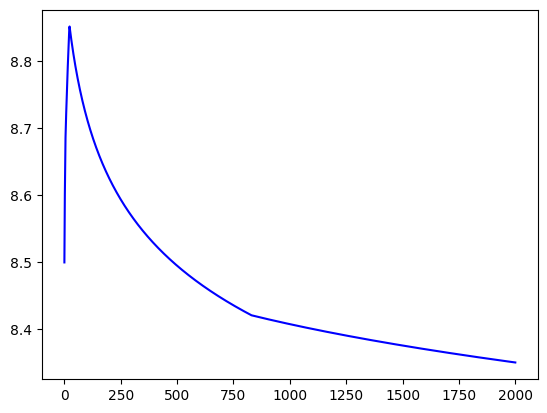

In [2]:
# Plot pH vs. time
fig1, ax = plt.subplots()
ax.plot(
    sim_df["time"],
    sim_df["pH"],
    linestyle="-",
    color="blue",
    label="pH",
)